>Based on: pyomeca/notebooks/getting-started.ipynb
To analyse markers data, we will use the Markers class:

In [3]:
import pyomeca
import sys

sys.path.append("..")

# Plot style
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("svg")
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-ticks")
%matplotlib inline
# %load_ext lab_black

In [4]:
from pyomeca import Markers

data_path = "../Jupyter/c3d/2010-12-16-B0035-S01-T01.c3d"
markers = Markers.from_c3d(data_path, prefix_delimiter=":")

In [5]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 197, time: 571)>
array([[[-2.30223618e+01, -2.29265652e+01, -2.28332882e+01, ...,
         -6.26788788e+01, -6.30277100e+01, -6.33948898e+01],
        [-1.73960892e+02, -1.73877213e+02, -1.73796143e+02, ...,
         -2.14669296e+02, -2.15046295e+02, -2.15442291e+02],
        [-6.23964214e+00, -6.16296196e+00, -6.08738995e+00, ...,
         -5.74809227e+01, -5.72695274e+01, -5.70447006e+01],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 2.36335034e+03,  2.36339673e+03,  2.36343970e+03, ...,
         -2.10627100e+03, -2.10736670e+03, -2.10848047e+03],
        [ 2.36567358e+03,  2.36569019e+03,  2.36570508e+03, ...,
         -2.11366455e+03, -2.11409229e+03, -2.11450073e+03],
        [ 2.47966846e+03,  2.47970215e+03,  2.47973340e+03, ...,
         -1.98600415e+03, -1.98697314e+03, -1.98795874e+03],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        ...,
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00]]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
  * channel  (channel) <U21 'LFHD' 'RFHD' ... 'LWristMoment' 'RWristMoment'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 ... 5.66 5.67 5.68 5.69 5.7
Attributes:
    first_frame:  0
    last_frame:   570
    rate:         100.0
    units:        mm

In this case, we have generated a 3D array with the axis, channel and time dimensions.

# Indexing
Let's see three ways to get the same data (ninth marker and first time frame).

>Positional indexing:

In [6]:
markers[:, 9, 0]

<xarray.DataArray 'markers' (axis: 4)>
array([8.85774994e+01, 2.48282104e+03, 1.51533801e+03, 1.00000000e+00])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LSHO'
    time     float64 0.0
Attributes:
    first_frame:  0
    last_frame:   570
    rate:         100.0
    units:        mm

>Label-based indexing:

Label-based indexing frees us from having to know how the data are organized. We do not have to rely on dimension order and can use them explicitly to index the data.

The isel method is used when the dimension lookup is by name and the index lookup is by integer

In [7]:
markers.isel(channel=9, time=0)

<xarray.DataArray 'markers' (axis: 4)>
array([8.85774994e+01, 2.48282104e+03, 1.51533801e+03, 1.00000000e+00])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LSHO'
    time     float64 0.0
Attributes:
    first_frame:  0
    last_frame:   570
    rate:         100.0
    units:        mm

# Metadata
Biomechanical datasets are usually more than just raw numbers and have various metadata attributes. Some metadata are already filled by pyomeca and available in the attrs Python dictionary.

In [8]:
markers.attrs

{'first_frame': 0, 'last_frame': 570, 'rate': 100.0, 'units': 'mm'}

In [9]:
markers.attrs["rate"]

100.0

In [10]:
markers.rate

100.0

In [36]:
markers.attrs["description"] = "Pierwszy plik c3d"
markers.time.attrs["units"] = "seconds"

In [37]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 197, time: 571)>
array([[[-2.30223618e+01, -2.29265652e+01, -2.28332882e+01, ...,
         -6.26788788e+01, -6.30277100e+01, -6.33948898e+01],
        [-1.73960892e+02, -1.73877213e+02, -1.73796143e+02, ...,
         -2.14669296e+02, -2.15046295e+02, -2.15442291e+02],
        [-6.23964214e+00, -6.16296196e+00, -6.08738995e+00, ...,
         -5.74809227e+01, -5.72695274e+01, -5.70447006e+01],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 2.36335034e+03,  2.36339673e+03,  2.36343970e+03, ...,
         -2.10627100e+03, -2.10736670e+03, -2.10848047e+03],
        [ 2.36567358e+03,  2.36569019e+03,  2.36570508e+03, ...,
         -2.11366455e+03, -2.11409229e+03, -2.11450073e+03],
        [ 2.47966846e+03,  2.47970215e+03,  2.47973340e+03, ...,
         -1.98600415e+03, -1.98697314e+03, -1.98795874e+03],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        ...,
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00]]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
  * channel  (channel) <U21 'LFHD' 'RFHD' ... 'LWristMoment' 'RWristMoment'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 ... 5.66 5.67 5.68 5.69 5.7
Attributes:
    first_frame:  0
    last_frame:   570
    rate:         100.0
    units:        mm
    description:  Pierwszy plik c3d

# Computation
Arithmetic

In [38]:
subset = markers[:,0,:6]

In [39]:
subset + 10

<xarray.DataArray 'markers' (axis: 4, time: 6)>
array([[ -13.02236176,  -12.92656517,  -12.83328819,  -12.74252701,
         -12.65427399,  -12.56851196],
       [2373.3503418 , 2373.39672852, 2373.43969727, 2373.47924805,
        2373.51513672, 2373.54785156],
       [1767.70080566, 1767.71276855, 1767.72302246, 1767.73144531,
        1767.73803711, 1767.74291992],
       [  11.        ,   11.        ,   11.        ,   11.        ,
          11.        ,   11.        ]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05

In [40]:
subset.T #transpose

<xarray.DataArray 'markers' (time: 6, axis: 4)>
array([[-2.30223618e+01,  2.36335034e+03,  1.75770081e+03,
         1.00000000e+00],
       [-2.29265652e+01,  2.36339673e+03,  1.75771277e+03,
         1.00000000e+00],
       [-2.28332882e+01,  2.36343970e+03,  1.75772302e+03,
         1.00000000e+00],
       [-2.27425270e+01,  2.36347925e+03,  1.75773145e+03,
         1.00000000e+00],
       [-2.26542740e+01,  2.36351514e+03,  1.75773804e+03,
         1.00000000e+00],
       [-2.25685120e+01,  2.36354785e+03,  1.75774292e+03,
         1.00000000e+00]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05
Attributes:
    first_frame:  0
    last_frame:   570
    rate:         100.0
    units:        mm
    description:  Pierwszy plik c3d

In [41]:
subset.mean()

<xarray.DataArray 'markers' ()>
array(1024.84710312)
Coordinates:
    channel  <U21 'LFHD'

In [42]:
subset.mean(axis=1)

<xarray.DataArray 'markers' (axis: 4)>
array([-2.27912547e+01,  2.36345483e+03,  1.75772483e+03,  1.00000000e+00])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LFHD'

In [43]:
subset.mean(dim="time")

<xarray.DataArray 'markers' (axis: 4)>
array([-2.27912547e+01,  2.36345483e+03,  1.75772483e+03,  1.00000000e+00])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LFHD'

In [44]:
only_first_axis = subset.sel(axis="x")
only_first_frame = subset.isel(time=0)

In [45]:
only_first_axis

<xarray.DataArray 'markers' (time: 6)>
array([-23.02236176, -22.92656517, -22.83328819, -22.74252701,
       -22.65427399, -22.56851196])
Coordinates:
    axis     <U4 'x'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05
Attributes:
    first_frame:  0
    last_frame:   570
    rate:         100.0
    units:        mm
    description:  Pierwszy plik c3d

In [46]:
only_first_frame

<xarray.DataArray 'markers' (axis: 4)>
array([-2.30223618e+01,  2.36335034e+03,  1.75770081e+03,  1.00000000e+00])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LFHD'
    time     float64 0.0
Attributes:
    first_frame:  0
    last_frame:   570
    rate:         100.0
    units:        mm
    description:  Pierwszy plik c3d

In [47]:
only_first_frame + only_first_axis

<xarray.DataArray 'markers' (axis: 4, time: 6)>
array([[ -46.04472351,  -45.94892693,  -45.85564995,  -45.76488876,
         -45.67663574,  -45.59087372],
       [2340.32798004, 2340.42377663, 2340.5170536 , 2340.60781479,
        2340.69606781, 2340.78182983],
       [1734.67844391, 1734.77424049, 1734.86751747, 1734.95827866,
        1735.04653168, 1735.1322937 ],
       [ -22.02236176,  -21.92656517,  -21.83328819,  -21.74252701,
         -21.65427399,  -21.56851196]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05

In [48]:
only_first_axis.values + only_first_axis.values

array([-46.04472351, -45.85313034, -45.66657639, -45.48505402,
       -45.30854797, -45.13702393])

In [49]:
subset - subset.T

<xarray.DataArray 'markers' (axis: 4, time: 6)>
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.01 0.02 0.03 0.04 0.05

# Application: exploring missing values

In [50]:
markers_null_values = markers.sel(axis="x").isnull()
print(f"There are {markers_null_values.sum().values} missing values.")

There are 3423 missing values.


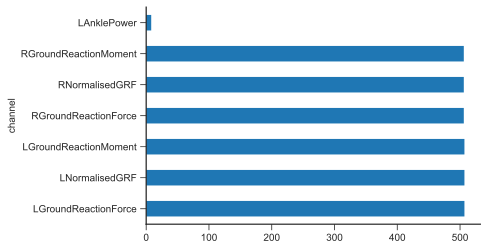

In [68]:
markers_null_values.sum(dim="time").to_series().nlargest(7).plot.barh();

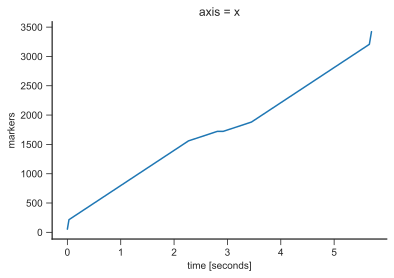

In [69]:
markers_null_values.sum("channel").cumsum("time").plot();

In [76]:
markers_without_null = markers.interpolate_na(dim="time", method="cubic")

In [74]:
#markers.sel(axis="x", channel="LGroundReactionForce").plot.line(x="time")
#(
#    markers_without_null.where(markers.isnull())
#    .sel(axis="x", channel="LGroundReactionForce")
#    .plot.line(x="time", label="Interpolated", color="g")
#)
#plt.legend();

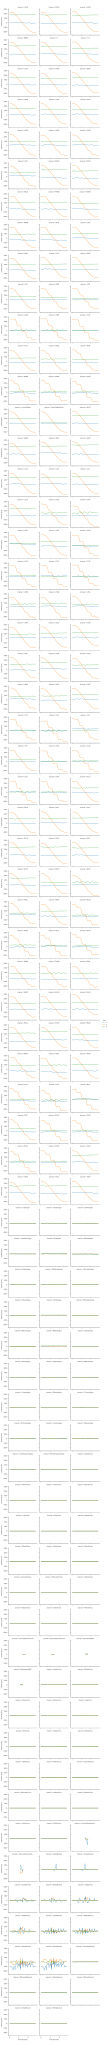

In [81]:
(
    markers_without_null.drop_sel(axis="ones")
    .isel(channel=slice(0,197))
    .plot.line(x="time", col="channel", hue="axis", col_wrap=3)
)